

---
- Mai Xuân Bách
- 11200489
- DSEB 62


---





# Imports

In [1]:
import torch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# 1.
Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:

- Lr = 0.2
- Lr = 2


In [4]:
# Define the cost function and its gradient
def f(x):
    return x**2

def df(x):
    return 2 * x

# Gradient Descent with a termination condition based on f(x)
def gradient_descent(initial_x, learning_rate, max_iterations, epsilon, plot_iterations = None):
    x = initial_x
    iteration = 0

    x_history = []  # Store x values for plotting
    y_history = []  # Store f(x) values for plotting
    prev_f_x = f(x)

    while iteration < max_iterations:
        gradient = df(x)
        x_new = x - learning_rate * gradient
        new_f_x = f(x_new)

        # Termination condition: Check if the change in f(x) is smaller than epsilon
        if abs(new_f_x - prev_f_x) < epsilon:
            break

        x = x_new
        prev_f_x = new_f_x
        iteration += 1

        if plot_iterations is not None and iteration < plot_iterations:
            x_history.append(x)
            y_history.append(new_f_x)

    return x, x_history, y_history

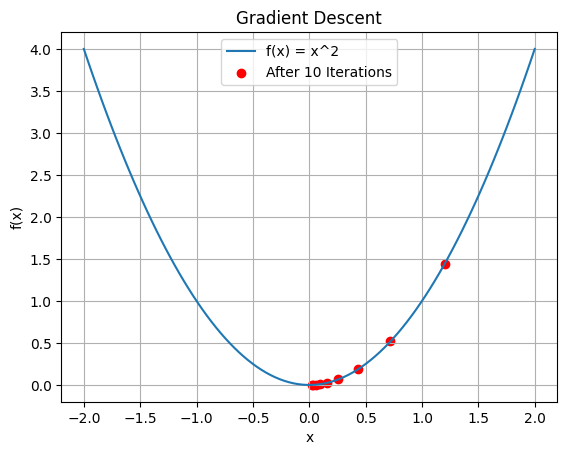

In [5]:
# Parameters
initial_x = 2
learning_rate = 0.2
max_iterations = 1000
epsilon = 1e-6  # Termination threshold based on change in f(x)
plot_iterations = 10 # Plot f(x) every 10 iterations

# Perform gradient descent
optimal_x, x_history, y_history = gradient_descent(initial_x, learning_rate, max_iterations, epsilon, plot_iterations)

# Plot f(x) after specified iterations
x_values = np.linspace(-2, 2, 100)
y_values = f(x_values)
plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(x_history, y_history, color='red', label=f'After {plot_iterations} Iterations')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Gradient Descent')
plt.grid(True)
plt.show()

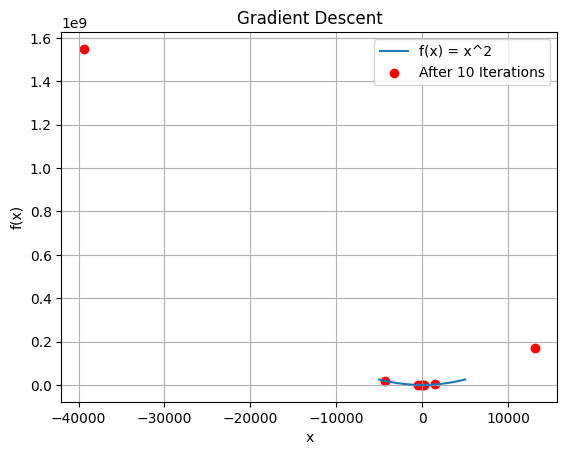

In [6]:
# Parameters
initial_x = 2
learning_rate = 2
max_iterations = 1000
epsilon = 1e-6  # Termination threshold based on change in f(x)
plot_iterations = 10 # Plot f(x) every 10 iterations

# Perform gradient descent
optimal_x, x_history, y_history = gradient_descent(initial_x, learning_rate, max_iterations, epsilon, plot_iterations)

# Plot f(x) after specified iterations
x_values = np.linspace(-5000, 5000, 1000)
y_values = f(x_values)
plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(x_history, y_history, color='red', label=f'After {plot_iterations} Iterations')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Gradient Descent')
plt.grid(True)
plt.show()

# 2:
Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv)
Dựa vào code mẫu hãy
- Implement thuật toán linear regression với dữ liệu trên
- Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test


## Implement

In [7]:
data = pd.read_csv('/content/data_linear.csv')
data

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


Text(0, 0.5, 'Giá nhà')

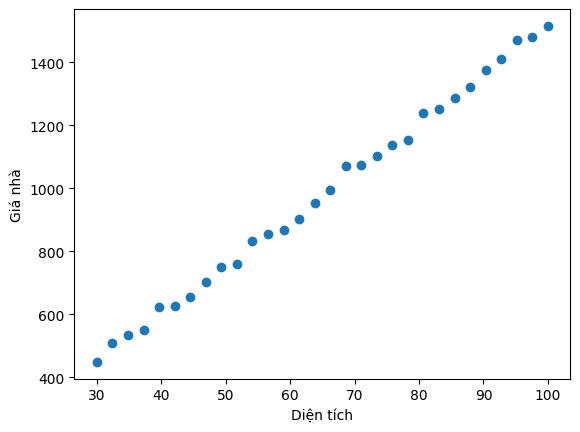

In [8]:
plt.scatter(data["Diện tích"], data["Giá"])
plt.xlabel("Diện tích")
plt.ylabel("Giá nhà")

In [9]:
def grad_general(w, x, y):
  y_hat = x @ w
  grad = ((y_hat - y).T @ x / x.size(0)).reshape(-1, 1)
  return grad

def gradient_descent(w, x, y, lr = 1e-5, n_iter = 100):
  loss_lst = []
  for iter in range(n_iter):
    #print("w", w,  w.size())
    g = grad_general(w, x, y)
    #print("g", g,  g.size())
    w = w - lr * g
    y_hat = x @ w

    loss =  torch.sum((y - y_hat) ** 2) / (2 * x.size(0))
    #print(loss)
    loss_lst.append(loss)

  torch.Tensor.ndim = property(lambda self: len(self.shape))
  plt.plot(loss_lst)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("At learning rate = {}".format(lr))

  return w

def linear_regression(random_w, x, y, lr = 1e-5):
  result = gradient_descent(random_w, x, y, lr)
  w = result
  print("w", w,  w.size())
  y_hat = x @ w
  print("y_hat", y_hat,  y_hat.size())
  #print("x", x.size())
  return y_hat

In [10]:
random_w = torch.randn(2, 1)
x = torch.tensor(data["Diện tích"].astype(np.float32))
y = torch.tensor(data["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # insert 1s col to x
y = y.reshape(-1, 1)
print(x)
print(y)

tensor([[  1.0000,  30.0000],
        [  1.0000,  32.4138],
        [  1.0000,  34.8276],
        [  1.0000,  37.2414],
        [  1.0000,  39.6552],
        [  1.0000,  42.0690],
        [  1.0000,  44.4828],
        [  1.0000,  46.8966],
        [  1.0000,  49.3103],
        [  1.0000,  51.7241],
        [  1.0000,  54.1379],
        [  1.0000,  56.5517],
        [  1.0000,  58.9655],
        [  1.0000,  61.3793],
        [  1.0000,  63.7931],
        [  1.0000,  66.2069],
        [  1.0000,  68.6207],
        [  1.0000,  71.0345],
        [  1.0000,  73.4483],
        [  1.0000,  75.8621],
        [  1.0000,  78.2759],
        [  1.0000,  80.6897],
        [  1.0000,  83.1034],
        [  1.0000,  85.5172],
        [  1.0000,  87.9310],
        [  1.0000,  90.3448],
        [  1.0000,  92.7586],
        [  1.0000,  95.1724],
        [  1.0000,  97.5862],
        [  1.0000, 100.0000]])
tensor([[ 448.5240],
        [ 509.2480],
        [ 535.1040],
        [ 551.4320],
        [ 623.4

## Change learning rate

### Moderate learning rate -> OK

w tensor([[ 1.7694],
        [14.9638]]) torch.Size([2, 1])
y_hat tensor([[ 450.6829],
        [ 486.8025],
        [ 522.9220],
        [ 559.0416],
        [ 595.1612],
        [ 631.2808],
        [ 667.4003],
        [ 703.5199],
        [ 739.6380],
        [ 775.7576],
        [ 811.8772],
        [ 847.9968],
        [ 884.1163],
        [ 920.2359],
        [ 956.3555],
        [ 992.4751],
        [1028.5946],
        [1064.7142],
        [1100.8339],
        [1136.9534],
        [1173.0730],
        [1209.1925],
        [1245.3107],
        [1281.4302],
        [1317.5498],
        [1353.6694],
        [1389.7889],
        [1425.9086],
        [1462.0281],
        [1498.1477]]) torch.Size([30, 1])


tensor([[ 450.6829],
        [ 486.8025],
        [ 522.9220],
        [ 559.0416],
        [ 595.1612],
        [ 631.2808],
        [ 667.4003],
        [ 703.5199],
        [ 739.6380],
        [ 775.7576],
        [ 811.8772],
        [ 847.9968],
        [ 884.1163],
        [ 920.2359],
        [ 956.3555],
        [ 992.4751],
        [1028.5946],
        [1064.7142],
        [1100.8339],
        [1136.9534],
        [1173.0730],
        [1209.1925],
        [1245.3107],
        [1281.4302],
        [1317.5498],
        [1353.6694],
        [1389.7889],
        [1425.9086],
        [1462.0281],
        [1498.1477]])

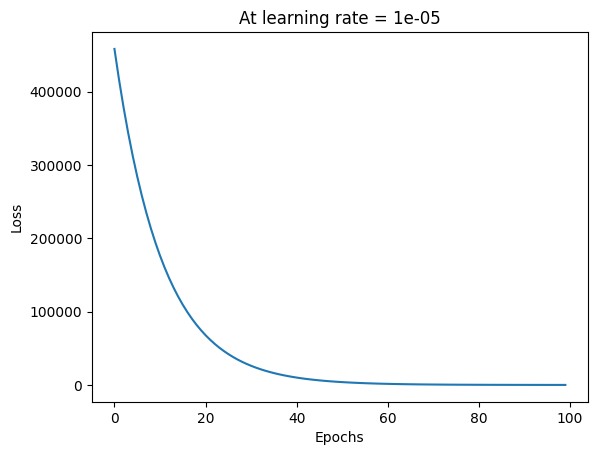

In [11]:
y_hat = linear_regression(random_w, x, y, 1e-5)
y_hat

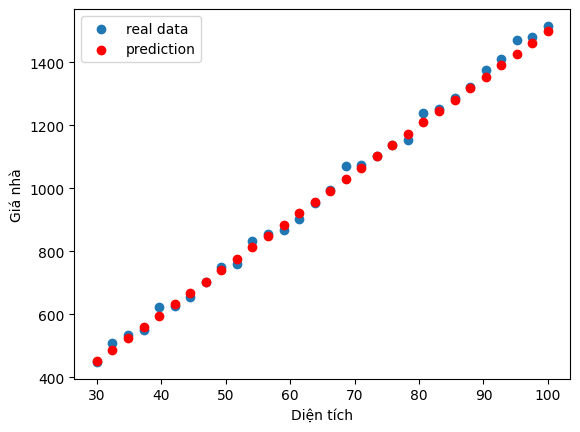

In [12]:
plt.scatter(data["Diện tích"], data["Giá"], label = "real data")
plt.scatter(data["Diện tích"], y_hat, c = "r", label = "prediction")
plt.xlabel("Diện tích")
plt.ylabel("Giá nhà")
plt.legend()

### Large LR: Overshoot

w tensor([[nan],
        [nan]]) torch.Size([2, 1])
y_hat tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]) torch.Size([30, 1])


tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]])

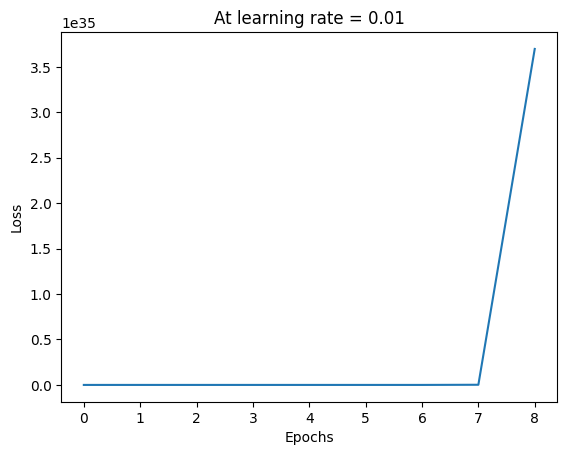

In [13]:
y_hat = linear_regression(random_w, x, y, 1e-2)
y_hat

### Small LR:

w tensor([[1.5679],
        [0.4545]]) torch.Size([2, 1])
y_hat tensor([[15.2026],
        [16.2997],
        [17.3967],
        [18.4938],
        [19.5909],
        [20.6879],
        [21.7850],
        [22.8820],
        [23.9790],
        [25.0761],
        [26.1731],
        [27.2702],
        [28.3672],
        [29.4643],
        [30.5613],
        [31.6584],
        [32.7554],
        [33.8525],
        [34.9496],
        [36.0466],
        [37.1437],
        [38.2407],
        [39.3377],
        [40.4348],
        [41.5318],
        [42.6289],
        [43.7259],
        [44.8230],
        [45.9200],
        [47.0171]]) torch.Size([30, 1])


tensor([[15.2026],
        [16.2997],
        [17.3967],
        [18.4938],
        [19.5909],
        [20.6879],
        [21.7850],
        [22.8820],
        [23.9790],
        [25.0761],
        [26.1731],
        [27.2702],
        [28.3672],
        [29.4643],
        [30.5613],
        [31.6584],
        [32.7554],
        [33.8525],
        [34.9496],
        [36.0466],
        [37.1437],
        [38.2407],
        [39.3377],
        [40.4348],
        [41.5318],
        [42.6289],
        [43.7259],
        [44.8230],
        [45.9200],
        [47.0171]])

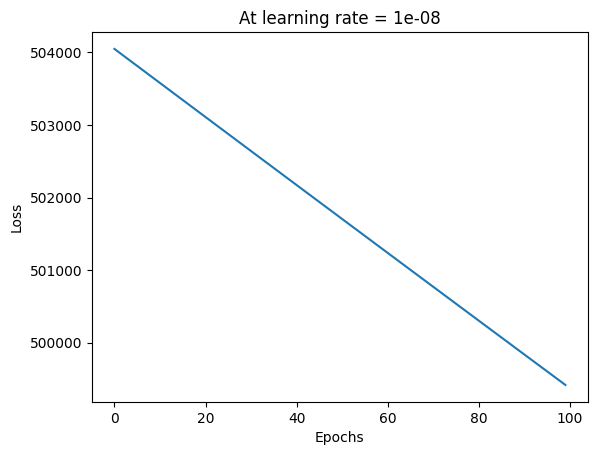

In [14]:
y_hat = linear_regression(random_w, x, y, 1e-8)
y_hat

## Train/test split, then calculate MSE, RMSE, MAE, MAPE

In [15]:
df = data.copy()
# Select a random 80% of the rows
np.random.seed(42)
percentage = 0.8
train_sample = df.sample(frac=percentage)

In [16]:
train_sample

,Diện tích,Giá
27,95.1724,1469.690
15,66.2069,995.531
23,85.5172,1287.970
17,71.0345,1074.420
8,49.3103,748.918
9,51.7241,757.881
28,97.5862,1478.540
24,87.9310,1320.470
12,58.9655,866.707
0,30.0000,448.524


In [17]:
# Calculate the indices of the rows to keep (the remaining 20%)
remaining_indices = df.index.difference(train_sample.index)
# Select the remaining 20% of rows based on the calculated indices
test_sample = df.loc[remaining_indices]
test_sample

,Diện tích,Giá
6,44.4828,655.248
7,46.8966,701.377
10,54.1379,831.004
14,63.7931,952.261
19,75.8621,1138.690
20,78.2759,1153.130


In [18]:
random_w = torch.randn(2, 1)
x = torch.tensor(train_sample.reset_index()["Diện tích"].astype(np.float32))
y = torch.tensor(train_sample.reset_index()["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x_train = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # insert 1s col to x
y_train = y.reshape(-1, 1)

tensor([[ 1.0569],
        [15.0221]])

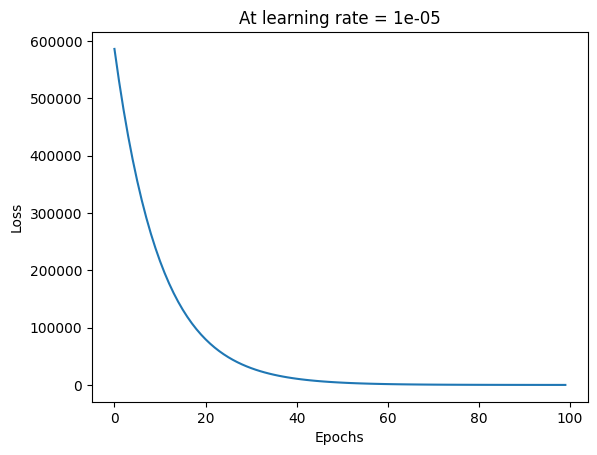

In [19]:
w = gradient_descent(random_w, x_train, y_train)
w

In [20]:
x = torch.tensor(test_sample.reset_index()["Diện tích"].astype(np.float32))
y = torch.tensor(test_sample.reset_index()["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x_test = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # insert 1s col to x
y_test = y.reshape(-1, 1)
y_test_hat = x_test @ w

In [21]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_hat)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_hat)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_test_hat)

# Print the calculated metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

MSE: 185.51
RMSE: 13.62
MAE: 11.29
MAPE: 0.01
